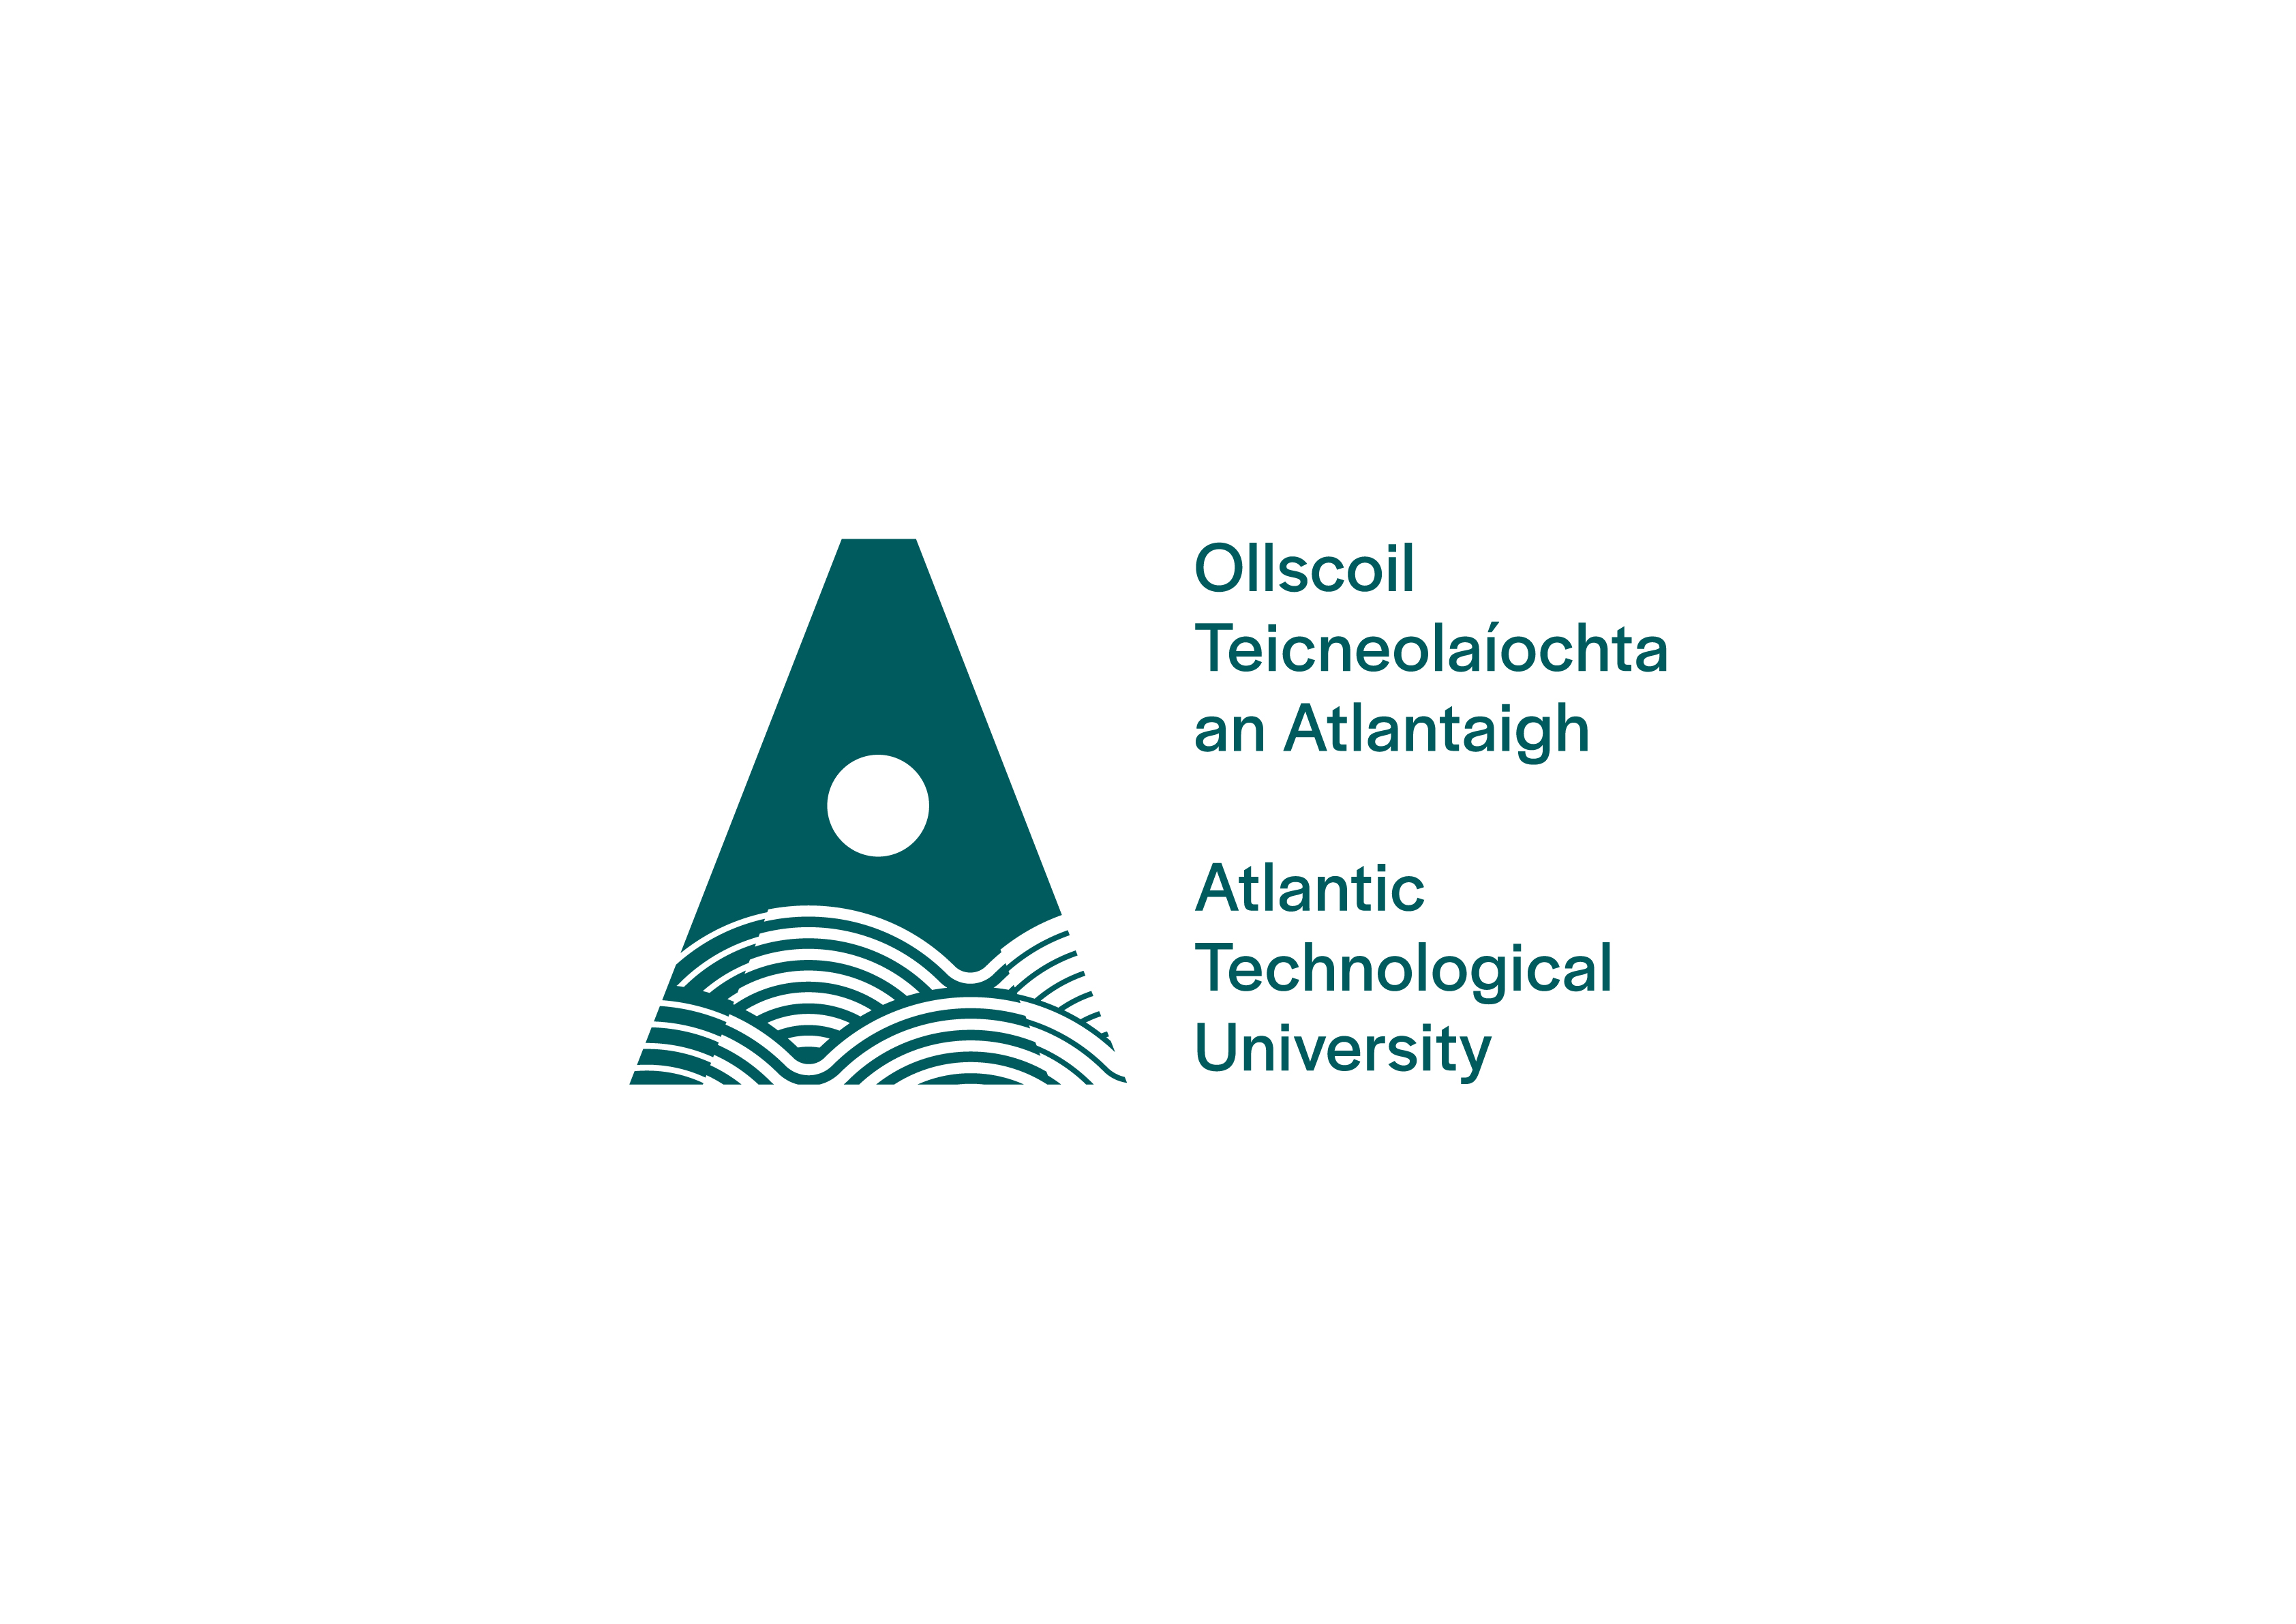

<h1 style="color: rgb(0, 133, 202);"> Normal Distribution</h1>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />



In [2]:
%matplotlib inline

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 14, 10

<h3 style="color: rgb(0, 133, 202);"> Probability Density Function</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

$$
y = \dfrac{1}{\sigma \sqrt{2\pi}}e^{-\dfrac{(x-\mu)^{2}}{2\sigma^{2}}}
$$

The probability density function of the normal distribution, when evaluated at $x$, gives the probability that a random variable $X$ in the distribution is $x$. 

Text(0.5, 1.0, 'Comparison of PDF functions with different $\\mu$ and $\\sigma$ values')

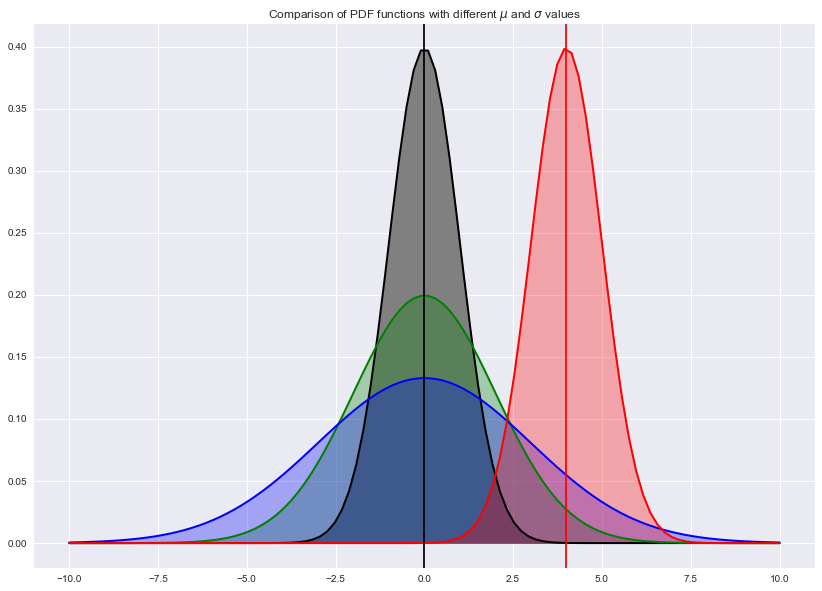

In [30]:
xmin, xmax = -10, 10
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, 0, 1)
q = ss.norm.pdf(x, 0, 2)
r = ss.norm.pdf(x, 0, 3)
s = ss.norm.pdf(x, 4, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, q, 'g', linewidth=2)
plt.plot(x, r, 'b', linewidth=2)
plt.plot(x, s, 'r', linewidth=2)
plt.fill_between(x, p, color = 'grey')
plt.fill_between(x, q, color = 'green', alpha=0.3)
plt.fill_between(x, r, color = 'blue', alpha=0.3)
plt.fill_between(x, s, color = 'red', alpha=0.3)
plt.axvline(0, color = 'k', linestyle = '-')
plt.axvline(4, color = 'r', linestyle = '-')
plt.title('Comparison of PDF functions with different $\mu$ and $\sigma$ values')

The PDF of 0 is 0.3989422804014327
The PDF of 1 is 0.24197072451914337
The PDF of -1 is 0.24197072451914337


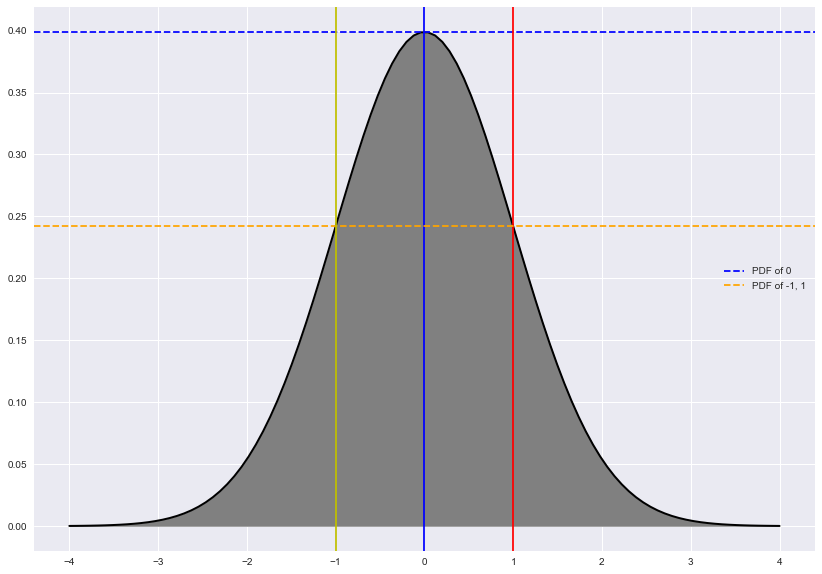

In [29]:
print("The PDF of 0 is {}".format(ss.norm().pdf(0)))
print("The PDF of 1 is {}".format(ss.norm().pdf(1)))
print("The PDF of -1 is {}".format(ss.norm().pdf(-1)))
xmin, xmax = -4, 4
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.axhline(ss.norm.pdf(0), color = 'b', linestyle = '--', label = "PDF of 0")
plt.axvline(0, color = 'b', linestyle = '-')
plt.axvline(1, color = 'r', linestyle = '-')
plt.axhline(ss.norm.pdf(-1), color = 'orange', linestyle = '--', label = "PDF of -1, 1")
plt.axvline(-1, color = 'y', linestyle = '-')
plt.fill_between(x, p, color = 'grey')
plt.legend()

<h3 style="color: rgb(0, 133, 202);"> Generating a normally distributed dataset</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

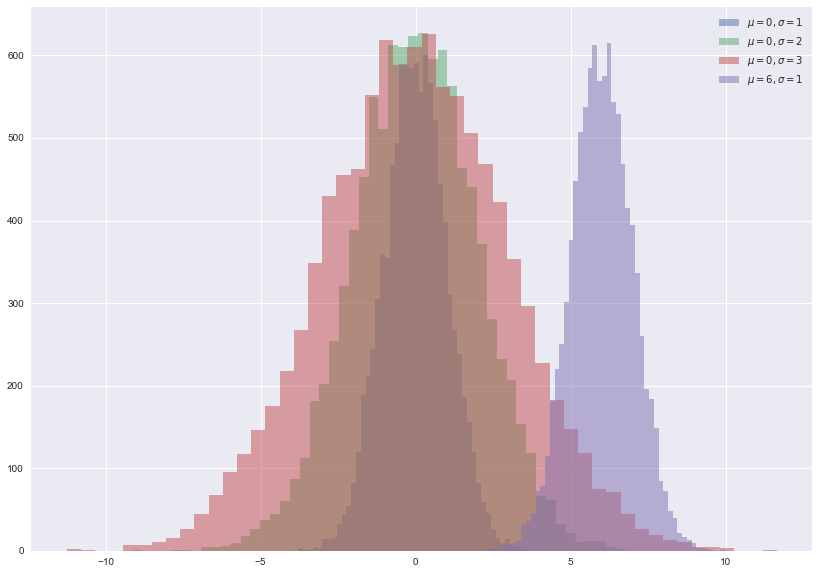

In [19]:
rng = np.random.default_rng()
legend=(['$\mu = 0, \sigma = 1$', '$\mu = 0, \sigma = 2$', '$\mu = 0, \sigma = 3$', '$\mu = 6, \sigma = 1$'])
values = rng.normal(0, 1, 10000)
values2 = rng.normal(0, 2, 10000)
values3 = rng.normal(0, 3, 10000)
values4 = rng.normal(6, 1, 10000)
plt.hist(values, bins=50, alpha=0.5)
plt.hist(values2, bins=50, alpha=0.5)
plt.hist(values3, bins=50, alpha=0.5)
plt.hist(values4, bins=50, alpha=0.5)
plt.legend(legend)

Central Limit Theorem and sample means

The cumulative distribution function of the normal distribution, when evaluated at $x$ gives the probability that a normally distributed continuous, real-valued variable $X$ will take a value less than or equal to $x$. The formula for the CDF of a normal distribution is given by<br />
<br />
$$
\\
F(x) = \Phi\Big(\dfrac{x - \mu}{\sigma}\Big) = \dfrac{1}{2}\Bigg[1 + \mathrm{erf}\Bigg(\dfrac{x - \mu}{\sigma\sqrt{2}}\Bigg)\Bigg]
\\
$$
<br />
We can calculated the CDF using the cdf method from scipy.stats package. For our array values above the CDF of 1 is 0.8413. That is the probability of a random variable $X$ in this distribution being less than or equal to $1$ is 0.8413. We can see this in the plot below. The probability that $X$ is less than or equal to $1$ is the area of the orange section.

The CDF of 1 for the our normal distribution is 0.8413.


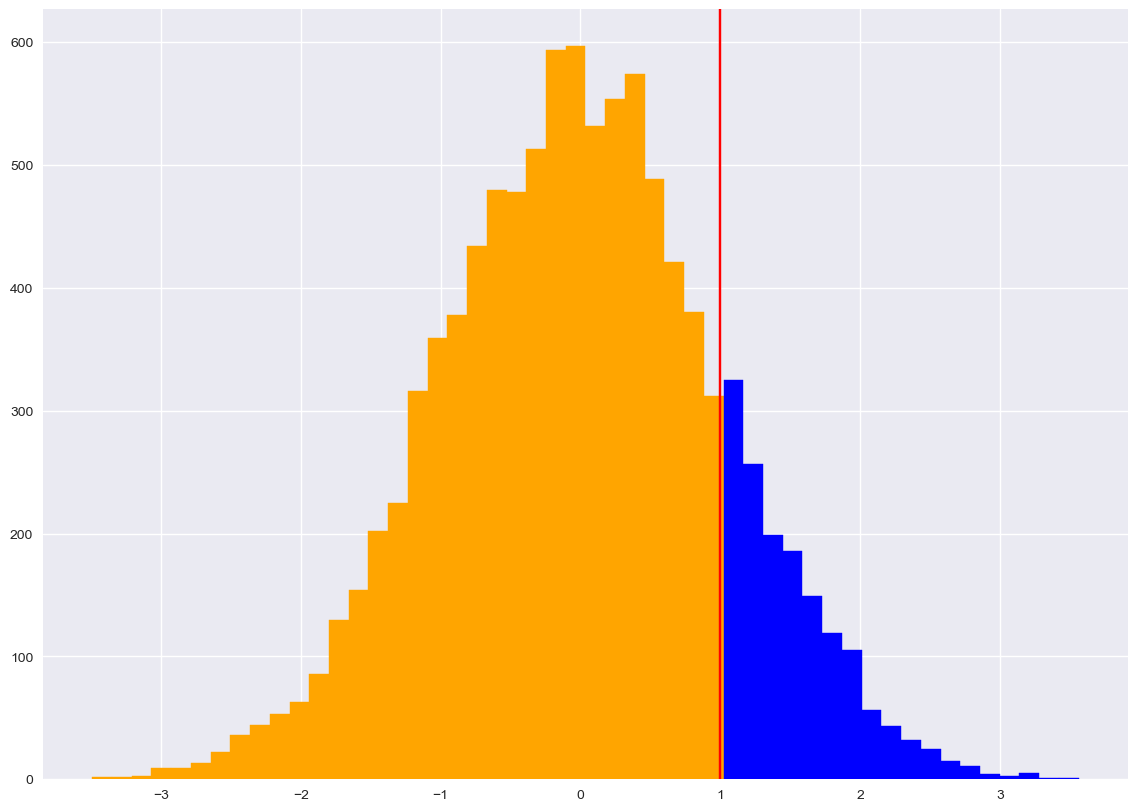

In [28]:
plt.hist(values, bins=50)
plt.axvline(1, color = 'r', linestyle = '-')
print("The CDF of 1 for the our normal distribution is {}.".format(round(ss.norm().cdf(1),4)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 1:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

One standard deviation either side of the mean covers 68.27% of the values in the normal distribution.


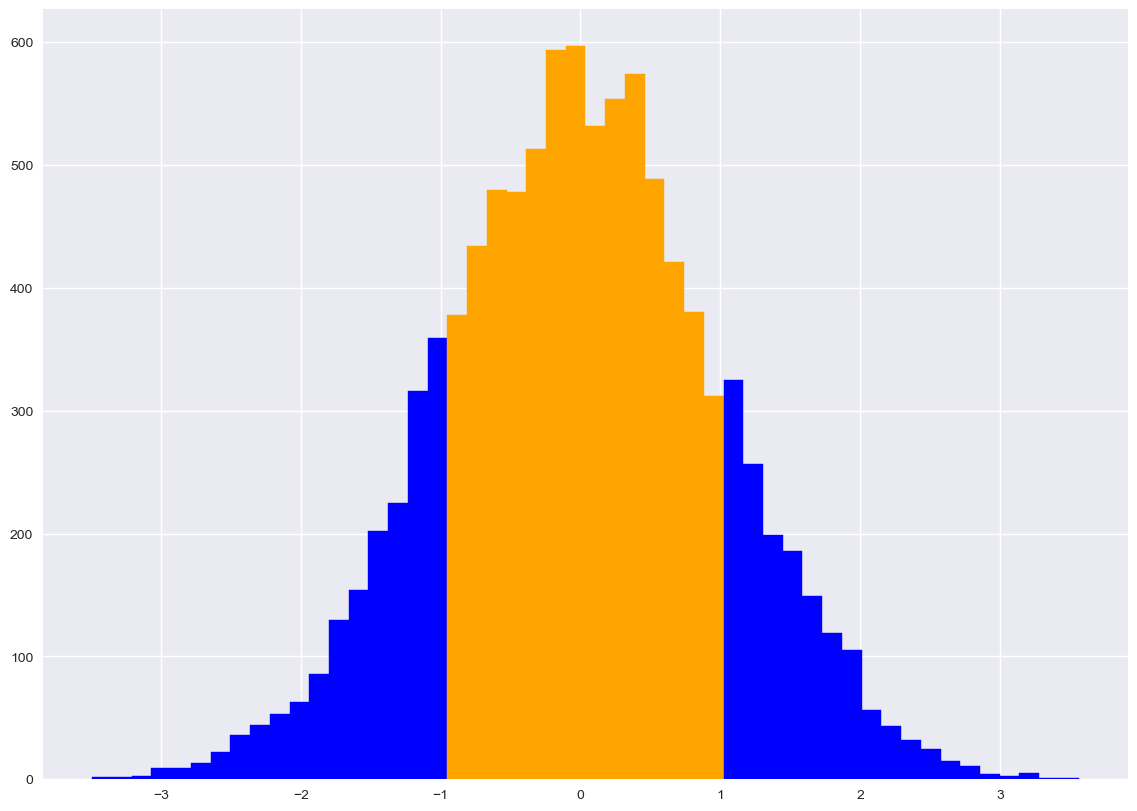

In [29]:
plt.hist(values, bins=50)
oneSigma = ss.norm().cdf(1) - ss.norm().cdf(-1)
print("One standard deviation either side of the mean covers {}% of the values in the normal distribution.".format(round(100*oneSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 1 and x >= -1:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

Two standard deviations either side of the mean cover 95.45% of the values in the normal distribution.


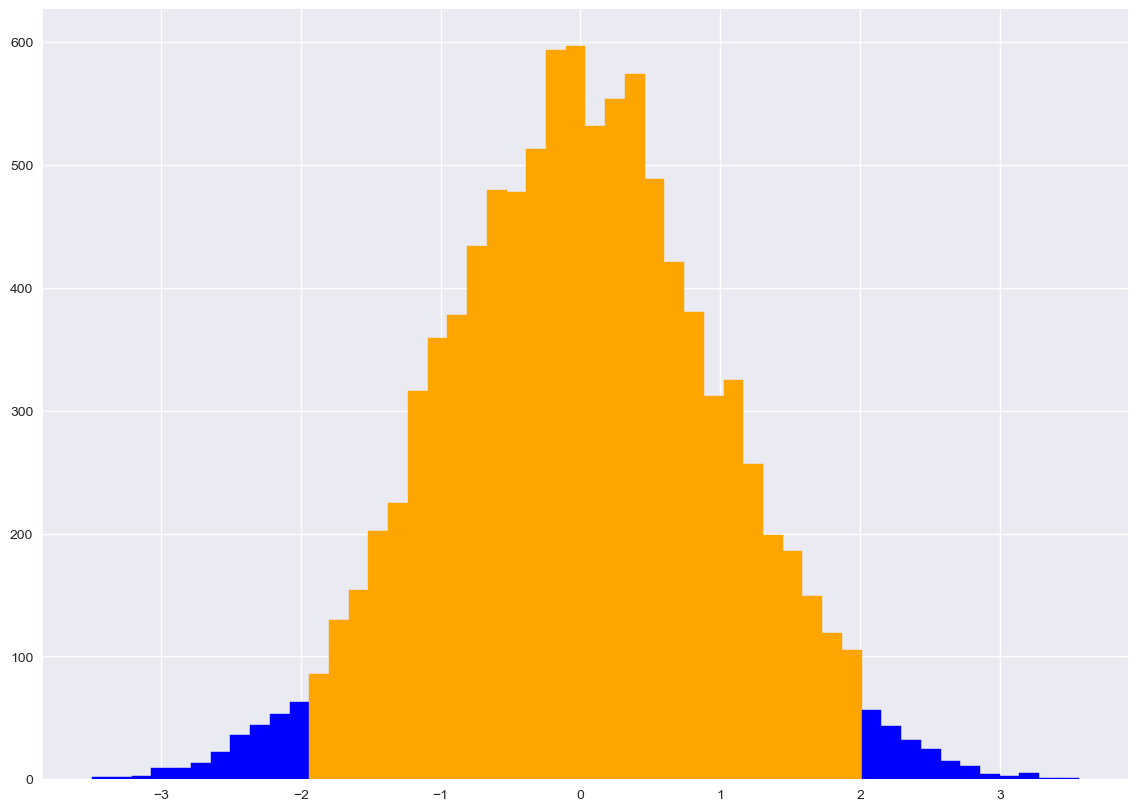

In [30]:
plt.hist(values, bins=50)
twoSigma = ss.norm().cdf(2) - ss.norm().cdf(-2)
print("Two standard deviations either side of the mean cover {}% of the values in the normal distribution.".format(round(100*twoSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 2 and x >= -2:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

Three standard deviations either side of the mean cover 99.73% of the values in the normal distribution.


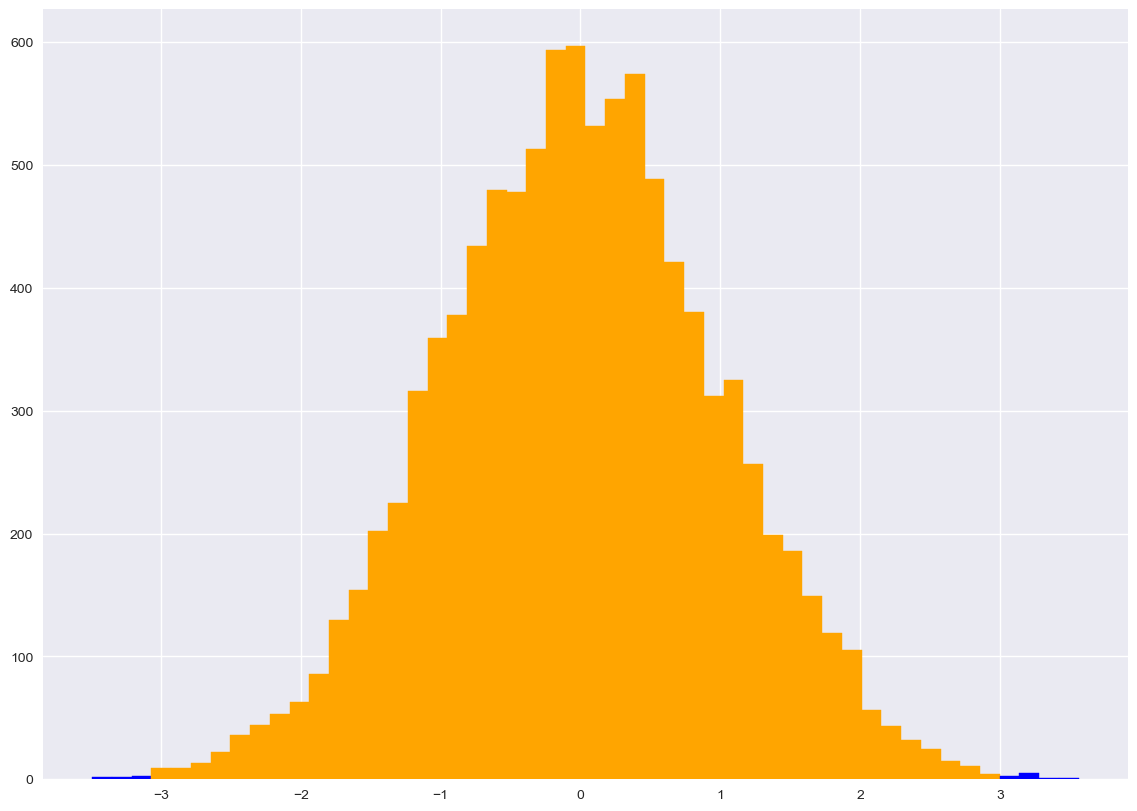

In [31]:
plt.hist(values, bins=50)
threeSigma = ss.norm().cdf(3) - ss.norm().cdf(-3)
print("Three standard deviations either side of the mean cover {}% of the values in the normal distribution.".format(round(100*threeSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 3 and x >= -3:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

<h3 style="color: rgb(0, 133, 202);">Industry applications of the normal distribution</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

A major application of the normal distribution in industry is the control of manufacturing processes. Many processes, such as the high volume manufacture of nuts and bolts, present as normally distributed values. The normal distribution can be used to define limits for these processes to determine if a process is stable or if a particular, abnormal issue (known as a special cause) is causing a problem with the process. This discipline is called Statistical Process Control and is based around the use of the cumulative distribution function. We have already seen that 99.7% of values of a normal distribution are found within 3 standard deviations of the mean. We can use this to define how stable or capable a process is.

In [32]:
ss.norm().cdf(3) - ss.norm().cdf(-3)

0.9973002039367398

<h3 style="color: rgb(0, 133, 202);"> Capability</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

If we had built a machine for cutting steel bars into 1 metre lengths, how would we know if it is reliable and accurate? We understand there is always going to be a certain amount of variation so we need a way of defining how much variation is too much. Our specification for the length of the bars is 1000mm +/- 10mm. This means our lower spec limit will  be 990mm and our upper spec limit is 1010mm. We run a few trials on the machine and get the following measurements.

In [40]:
trials = rng.normal(1000, 3, 100)
trials

array([ 999.52270078,  999.44665046, 1001.9991702 ,  998.21472108,
       1000.0034781 , 1005.37392166,  995.99591995, 1000.63721632,
        999.5709145 , 1000.99847667,  997.76256901, 1002.1180068 ,
        995.69794838, 1001.27867088, 1002.48399661, 1000.37011176,
        994.12907326,  998.72817851, 1003.46326212, 1000.57839925,
       1000.3345006 ,  999.11981355, 1002.97464689, 1003.13318294,
        995.31813289,  995.61022159, 1001.96242965, 1003.2710711 ,
       1003.32633501, 1000.65999599,  993.87377554, 1004.35737619,
       1002.05632442,  995.94859477,  994.75926561, 1004.56760371,
        995.62163124,  996.16075837,  999.9279041 , 1004.34888757,
       1002.39319223, 1003.90315203, 1001.56368976,  999.28978757,
       1006.15319796,  998.36796337,  999.59783516, 1001.49876583,
        998.26209395, 1000.99099917,  997.84749258, 1002.3460701 ,
        994.5667616 , 1000.86063569, 1000.93229407,  998.06466484,
       1005.82920777, 1005.235271  , 1003.73173901, 1002.66081

Now we know that 99.7% of the values of this distribution will appear within 3 standard deviations of the mean so we can work out if our machine is reliable enough to keep all our bars in spec. By calculating the value of $6\sigma$ we can determine if the spread of the distribution is greater or smaller than the tolerance of the specification. We can calculate an index value known as Cp that shows the ratio between the tolerance of the specification and the spread of our data.

Formula for $Cp$:

$$
Cp = \dfrac{\text{Upper Spec Limit - Lower Spec Limit}}{6\sigma}
$$

A Cp value of 1 or greater means that the spread of data ($6\sigma$) is less than or equal to our specification and our machine is reliable enough to keep all finished bars in spec, if the mean of the length of the bars is kept close to the middle of the specification. We will now check the example above and calculate its Cp value.

In [45]:
specTolerance = 20 #upper spec (1010) - lower spec (990)
cp = specTolerance / (6*trials.std())
print('Cp = {}'.format(round(cp,2)))

Cp = 1.11


<h2 style="color: rgb(0, 133, 202);">References</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

https://en.wikipedia.org/wiki/Normal_distribution <br />
https://www.six-sigma-material.com/Normal-Distribution.html <br />
https://mathworld.wolfram.com/CentralLimitTheorem.html